   0.84  -0.25  -1.4058126562315
0 -0.22   0.92          0.747931
1  0.56   0.82          0.491664
2  0.20   0.78          1.006142
3 -0.79  -0.25         -1.571608
4 -0.55  -0.51         -0.959799


<IPython.core.display.Javascript object>


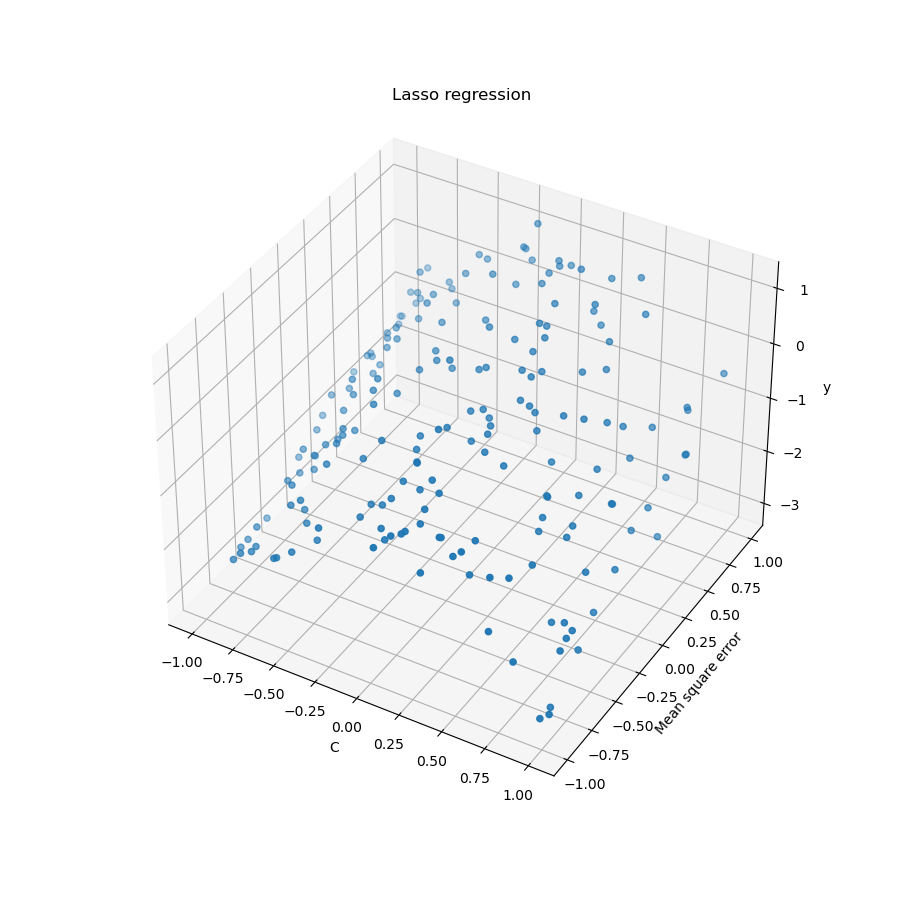

In [124]:
# id:8--16-8
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

df = pd.read_csv("week3.csv")
print(df.head())

X1=df.iloc[:,0]
X2=df.iloc[:,1]
X=np.column_stack((X1,X2))
y=df.iloc[:,2]


fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0],X[:,1], y)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
plt.show()

In [4]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 5)
X_poly = poly.fit_transform(X)
X_poly.shape

(198, 21)

In [8]:
from sklearn.linear_model import Lasso
C = [0.1, 1, 5, 10, 50, 100, 500, 1000]
for c in C:
    linlasso = Lasso(alpha=1/(2*c)).fit(X_poly, y)
    print('lasso regression linear model intercept: {}'
         .format(linlasso.intercept_))
    print('lasso regression linear model coeff:\n{}'
         .format(linlasso.coef_))

lasso regression linear model intercept: -0.7535938687916134
lasso regression linear model coeff:
[ 0. -0.  0. -0. -0. -0. -0.  0. -0.  0. -0.  0. -0.  0. -0. -0.  0. -0.
  0. -0.  0.]
lasso regression linear model intercept: -0.7535938687916134
lasso regression linear model coeff:
[ 0. -0.  0. -0. -0. -0. -0.  0. -0.  0. -0.  0. -0.  0. -0. -0.  0. -0.
  0. -0.  0.]
lasso regression linear model intercept: -0.391980186000374
lasso regression linear model coeff:
[ 0.          0.          0.74218665 -0.95563819  0.         -0.
 -0.          0.         -0.          0.         -0.          0.
 -0.          0.         -0.         -0.          0.         -0.
  0.         -0.          0.        ]
lasso regression linear model intercept: -0.2092721098019995
lasso regression linear model coeff:
[ 0.         -0.          0.88532077 -1.45383987  0.         -0.
 -0.          0.          0.          0.         -0.          0.
 -0.          0.         -0.         -0.          0.         -0.
  0.   

In [10]:
from sklearn.linear_model import Ridge
C = [0.1, 1, 5, 10, 50, 100, 500, 1000]
for c in C:
    linridge = Ridge(alpha=1/(2*c)).fit(X_poly, y)
    print('ridge regression linear model intercept: {}'
         .format(linridge.intercept_))
    print('ridge regression linear model coeff:\n{}'
         .format(linridge.coef_))

ridge regression linear model intercept: -0.19885238227963253
ridge regression linear model coeff:
[ 0.          0.03830958  0.77832203 -0.96548931 -0.003144    0.02785517
 -0.0599238   0.10816731  0.0842492   0.20899008 -0.77493189  0.00417413
 -0.16915473  0.05877964  0.03898967 -0.02625552  0.0333854  -0.00939593
 -0.01889527  0.03573698  0.0568579 ]
ridge regression linear model intercept: -0.08334688455495032
ridge regression linear model coeff:
[ 0.          0.03248109  1.007968   -1.3305447  -0.11254314 -0.02739412
 -0.19077625  0.0443242   0.32272797  0.06970231 -0.71319927  0.05004527
  0.07412249  0.20708674 -0.00299038  0.07348041 -0.04434167 -0.12275233
 -0.03781416 -0.04342161 -0.05611232]
ridge regression linear model intercept: -0.04391610049896755
ridge regression linear model coeff:
[ 0.          0.02384194  1.07846821 -1.53779078 -0.18560255 -0.08879369
 -0.37573792 -0.01533032  0.64969614 -0.05704183 -0.55358463  0.10624796
  0.20750241  0.2647497   0.01342556  0.288

In [106]:
X_test=[]
grid = np.linspace(-2,2)
for i in grid:
    for j in grid:
        X_test.append([i,j])
X_test = np.array(X_test)

X_poly_test = poly.fit_transform(X_test)
X_poly_test.shape

(2500, 21)

<IPython.core.display.Javascript object>


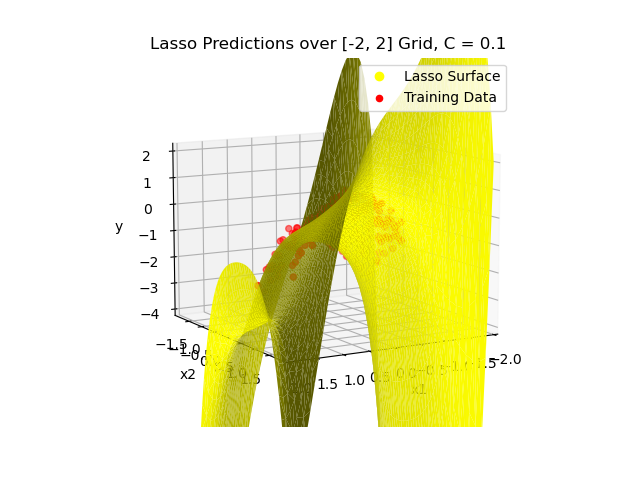

<IPython.core.display.Javascript object>


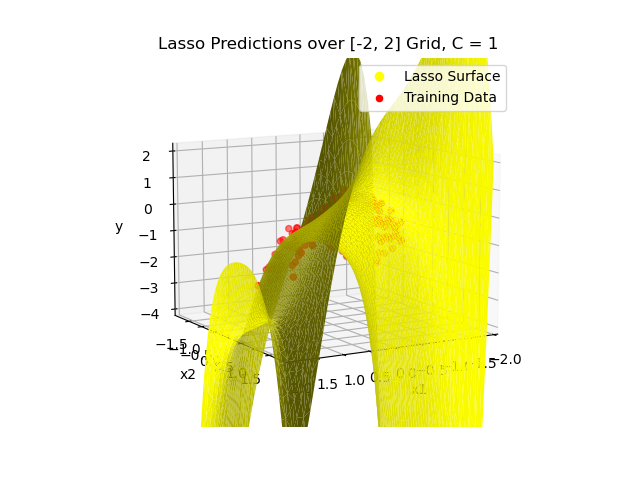

<IPython.core.display.Javascript object>


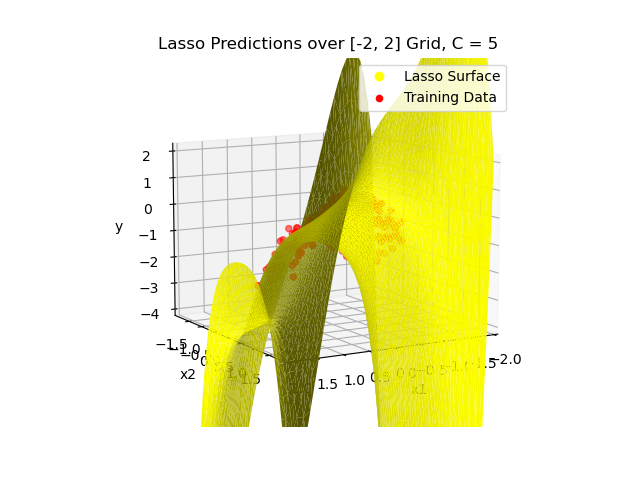

<IPython.core.display.Javascript object>


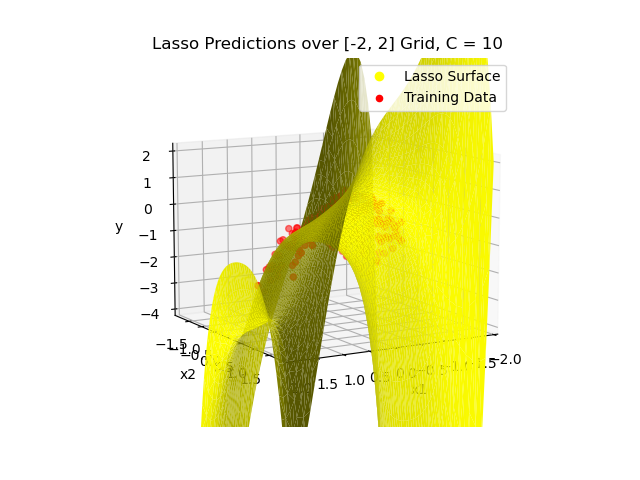

<IPython.core.display.Javascript object>


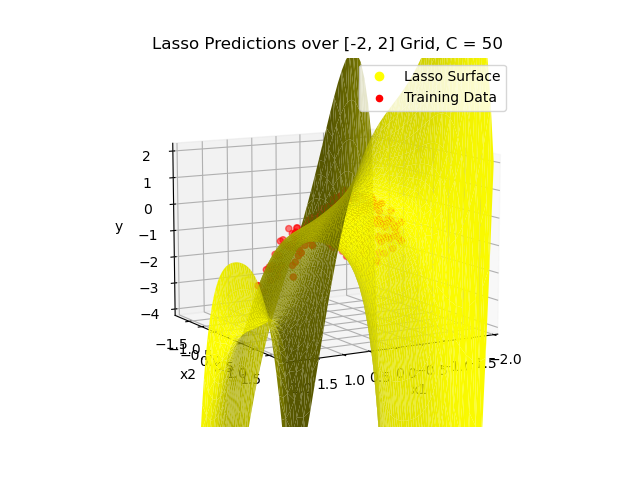

<IPython.core.display.Javascript object>


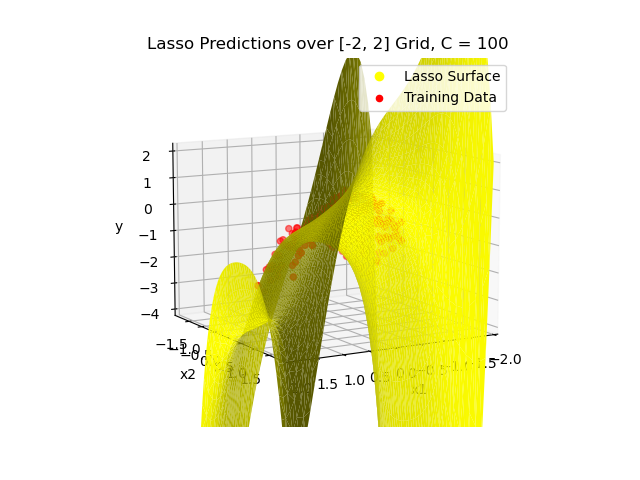

<IPython.core.display.Javascript object>


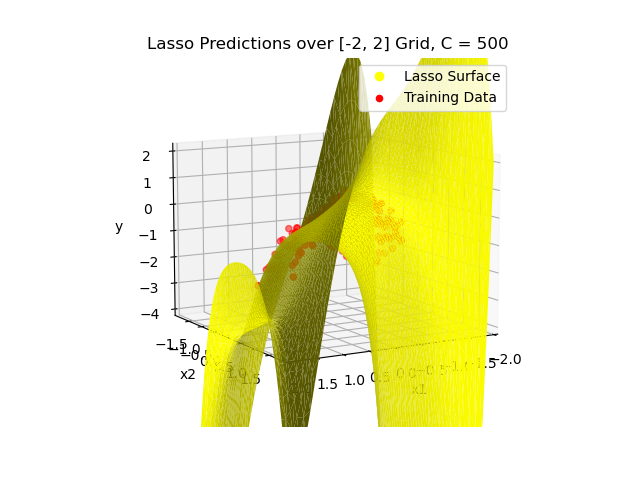

<IPython.core.display.Javascript object>


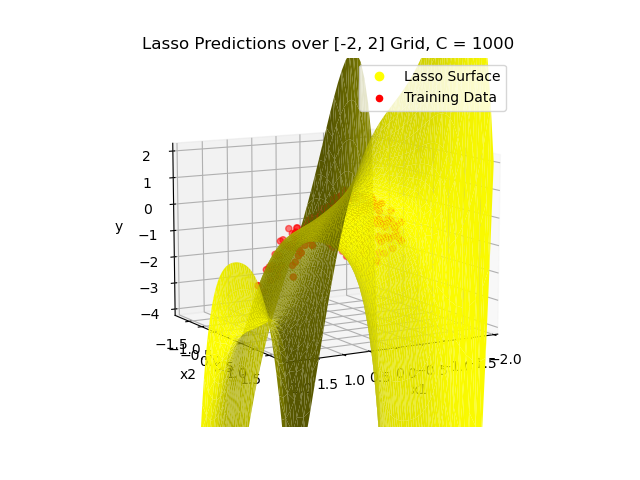

In [138]:
def graph(X_test, Y):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(X[:,0],X[:,1], y, color='red', label='Training')
    ax.plot_trisurf(X_test[:,0], X_test[:,1], Y, color='yellow', vmin=y.min()-1, vmax=y.max()+1)
    ax.set_xlim(xmin=X[:,0].min()-1, xmax=X[:,0].max()+1)
    ax.set_ylim(ymin=X[:,1].min()-1, ymax=X[:,1].max()+1)
    ax.set_zlim(zmin=y.min()-1, zmax=y.max()+1)
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('y')
    scatter1_proxy = plt.Line2D([0],[0], linestyle="none", c='yellow', marker = 'o')
    plt.legend([scatter1_proxy,scatter],['Lasso Surface','Training Data'])
    ax.set_title("Lasso Predictions over [-2, 2] Grid, C = " + str(c))
    ax.view_init(azim=60,elev=10)
    return plt

C = [0.1, 1, 5, 10, 50, 100, 500, 1000]
for c in C:
    linlasso = Lasso(alpha=1/(2*c)).fit(X_poly, y)
    Y = linridge.predict(X_poly_test)
    graph(X_test, Y).show()

<IPython.core.display.Javascript object>


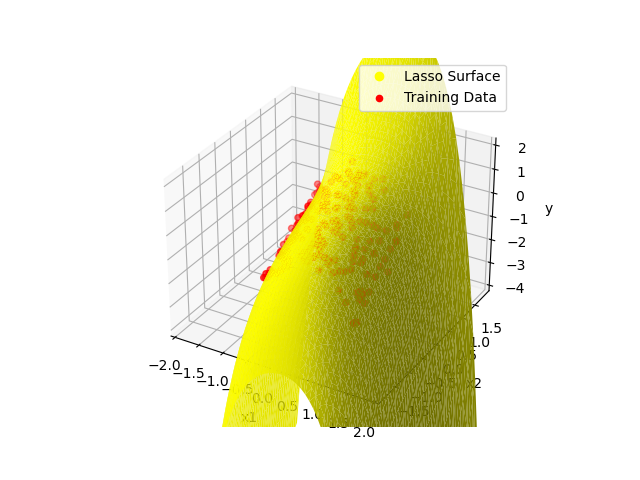

<IPython.core.display.Javascript object>


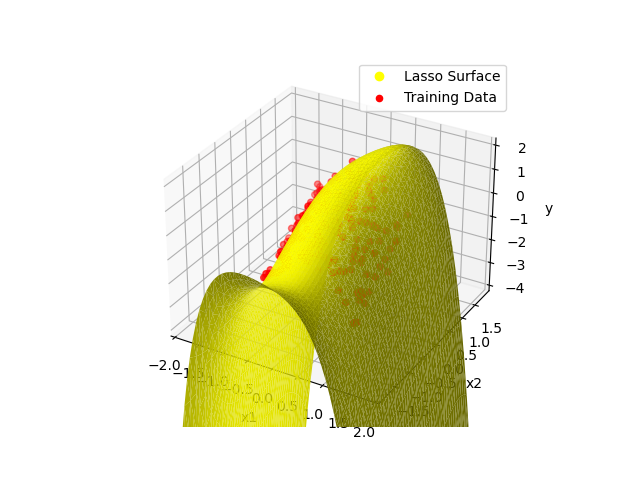

<IPython.core.display.Javascript object>


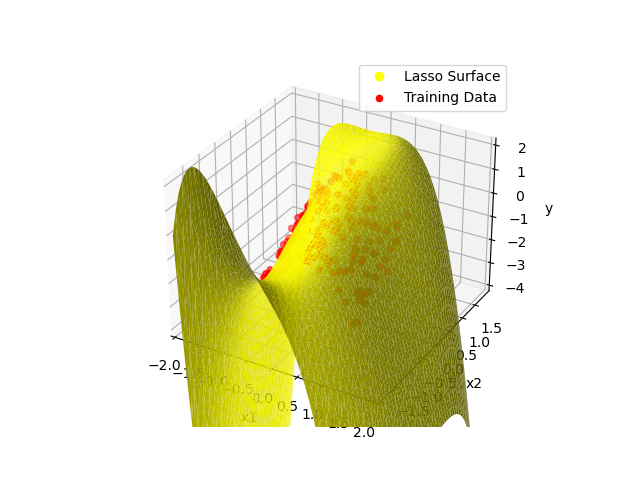

<IPython.core.display.Javascript object>


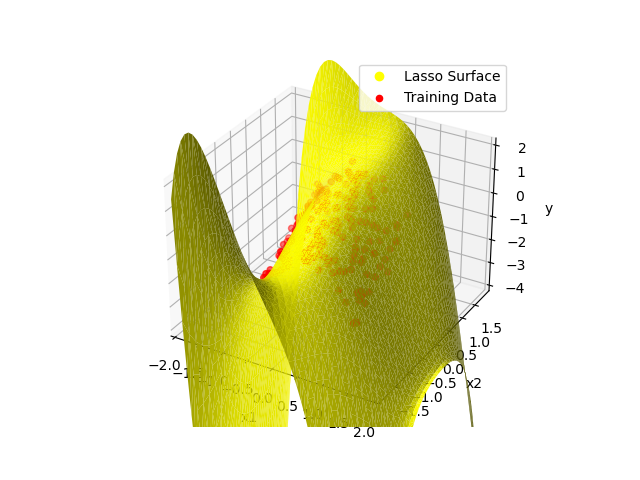

<IPython.core.display.Javascript object>


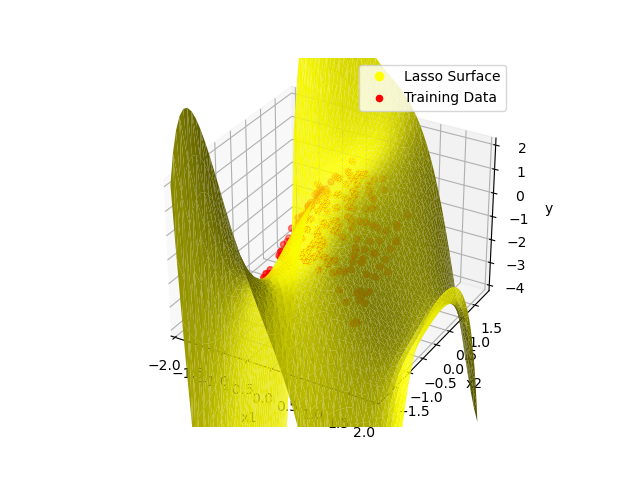

<IPython.core.display.Javascript object>


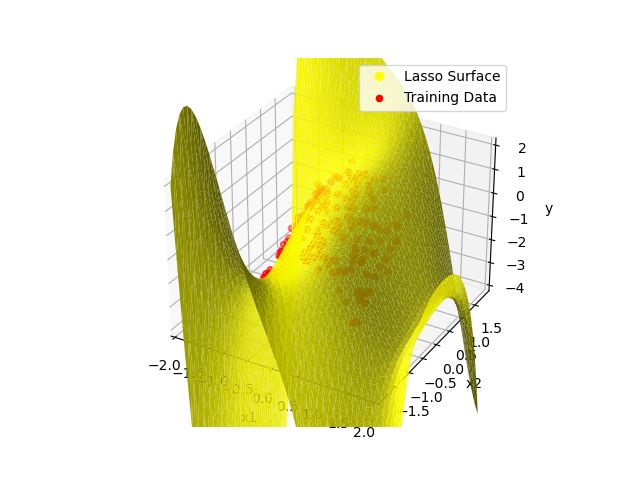

<IPython.core.display.Javascript object>


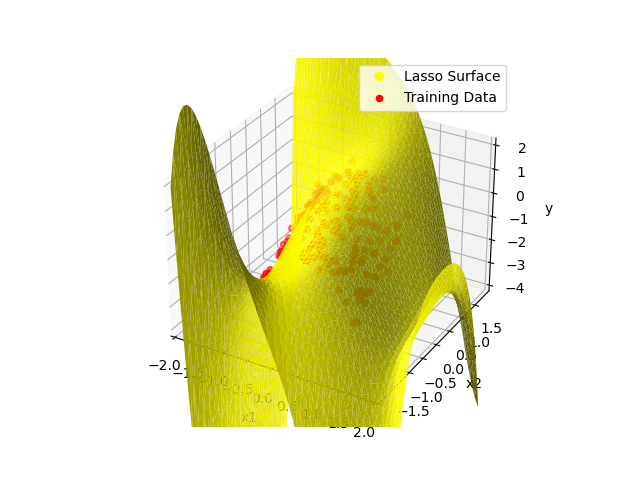

<IPython.core.display.Javascript object>


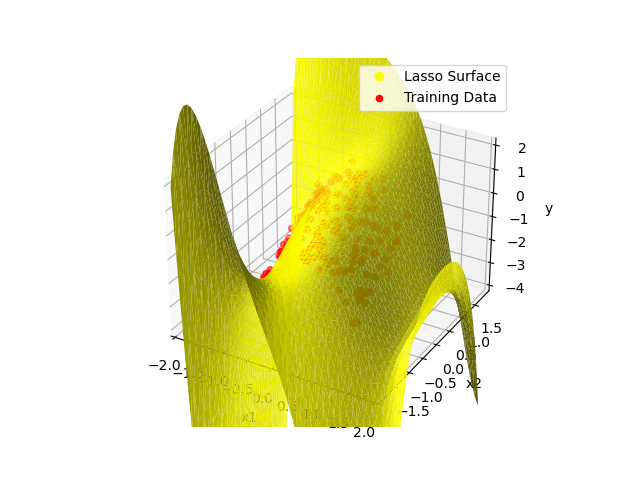

In [108]:
C = [0.1, 1, 5, 10, 50, 100, 500, 1000]
for c in C:
    linridge = Ridge(alpha=1/(2*c)).fit(X_poly, y)
    Y = linridge.predict(X_poly_test)
    graph(X_test, Y).show()

<IPython.core.display.Javascript object>


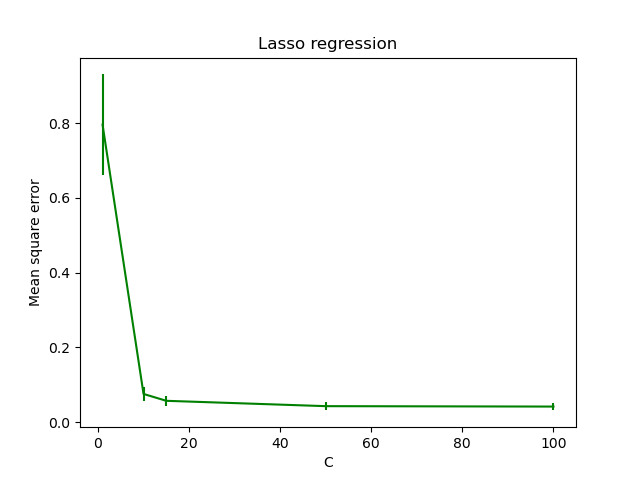

In [137]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
%matplotlib notebook
kmeans = KFold(n_splits = 5)

mean_error=[]; std_error=[]; df_results = []  
C = [1,10,15,50,100]

for c in C:
    mse_temp = []
        
    model = Lasso(alpha=1/(2*c)) 
                
    for train, test in kmeans.split(X_poly):
        model.fit(X_poly[train], y[train])
        Y = model.predict(X_poly[test])
        mse = mean_squared_error(y[test],Y)
        mse_temp.append(mse)
    mean_error.append(np.array(mse_temp).mean())
    std_error.append(np.array(mse_temp).std())


plt.errorbar(C, mean_error, yerr=std_error, color ='green')
plt.xlabel('C')
plt.ylabel('Mean square error')
plt.title('Lasso regression')
plt.show()

<IPython.core.display.Javascript object>


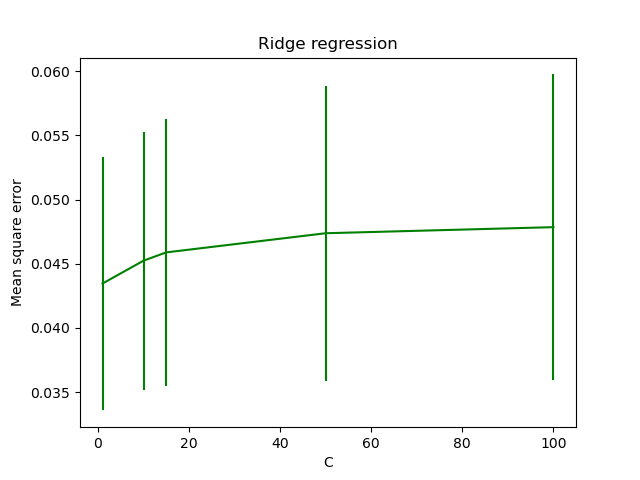

In [136]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
%matplotlib notebook
kmeans = KFold(n_splits = 5)

mean_error=[]; std_error=[]; df_results = []  
C = [1,10,15,50,100]

for c in C:
    mse_temp = []
        
    model = Ridge(alpha=1/(2*c)) 
                
    for train, test in kmeans.split(X_poly):
        model.fit(X_poly[train], y[train])
        Y = model.predict(X_poly[test])
        mse = mean_squared_error(y[test],Y)
        mse_temp.append(mse)
    mean_error.append(np.array(mse_temp).mean())
    std_error.append(np.array(mse_temp).std())


plt.errorbar(C, mean_error, yerr=std_error, color ='green')
plt.xlabel('C')
plt.ylabel('Mean square error')
plt.title('Ridge regression')
plt.show()